<a href="https://colab.research.google.com/github/kanhaia21/Assignments/blob/main/Boosting_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theoretical

In [1]:
content="""
1. What is Boosting in Machine Learning?
Boosting is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing, e.g., shallow decision trees) into a strong learner.
It works sequentially — each new model focuses on correcting the mistakes made by the previous ones.

2. How does Boosting differ from Bagging?
•	Bagging (Bootstrap Aggregating):
o	Builds models independently on random subsets of data (with replacement).
o	Aggregates results by voting (classification) or averaging (regression).
o	Reduces variance.
o	Example: Random Forest.
•	Boosting:
o	Builds models sequentially; each new model learns from previous errors.
o	Reduces bias and variance.
o	Example: AdaBoost, Gradient Boosting, XGBoost.

3. What is the key idea behind AdaBoost?
AdaBoost (Adaptive Boosting) assigns weights to data points:
•	Misclassified samples get higher weights so that the next weak learner focuses on them.
•	Correctly classified samples get lower weights.
The final model is a weighted combination of weak learners.

4. Explain the working of AdaBoost with an example.
Suppose we want to classify emails as Spam or Not Spam.
1.	Train a weak classifier (e.g., a decision stump).
2.	Check misclassified emails → increase their weights.
3.	Train the next classifier with focus on misclassified samples.
4.	Repeat until max iterations or error threshold is reached.
5.	Combine all weak classifiers with weights to form the final strong classifier.


5. What is Gradient Boosting, and how is it different from AdaBoost?
•	Gradient Boosting builds models sequentially, but instead of updating sample weights (like AdaBoost), it:
o	Fits new models on the residual errors (differences between predictions and true values).
o	Uses gradient descent to minimize a chosen loss function.
Difference:
•	AdaBoost → focuses on reweighting data points.
•	Gradient Boosting → fits models to minimize residuals via gradient descent.

6. What is the loss function in Gradient Boosting?
Depends on the task:
•	Regression: Mean Squared Error (MSE).
•	Classification: Logistic loss (binary cross-entropy).
•	In general: any differentiable loss function.

7. How does XGBoost improve over traditional Gradient Boosting?
XGBoost = Extreme Gradient Boosting. Improvements include:
•	Regularization (L1 & L2) to prevent overfitting.
•	Parallelization of tree construction (faster).
•	Handling missing values automatically.
•	Tree pruning using depth-first approach.
•	Cache optimization for speed.

8. What is the difference between XGBoost and CatBoost?
•	XGBoost: Efficient gradient boosting library, supports numerical features (categorical must be encoded).
•	CatBoost: Specially designed for categorical features. Uses ordered boosting and target-based statistics to handle categorical variables without explicit encoding.

9. What are some real-world applications of Boosting techniques?
•	Finance: Credit scoring, fraud detection.
•	Healthcare: Disease prediction, drug response analysis.
•	Marketing: Customer churn prediction, recommendation systems.
•	Competitions: Kaggle winning solutions often use XGBoost, LightGBM, or CatBoost.


10. How does regularization help in XGBoost?
Regularization prevents overfitting by:
•	L1 penalty (Lasso): encourages sparsity (feature selection).
•	L2 penalty (Ridge): penalizes large weights.
This makes the model more generalizable.

11. What are some hyperparameters to tune in Gradient Boosting models?
•	n_estimators: Number of trees.
•	learning_rate: Step size shrinkage.
•	max_depth: Depth of trees.
•	min_samples_split / min_child_weight: Minimum samples per leaf.
•	subsample: Fraction of data to use for each tree.
•	colsample_bytree: Fraction of features to use per tree.

12. What is the concept of Feature Importance in Boosting?
Boosting models compute feature importance by:
•	Gain: How much a feature improves the split.
•	Frequency: How often a feature is used in splits.
•	SHAP values (more advanced): Contribution of each feature to predictions.

13. Why is CatBoost efficient for categorical data?
•	Uses ordered target encoding instead of one-hot encoding → avoids data leakage.
•	Handles high-cardinality categorical features efficiently.
•	Built-in strategies reduce preprocessing time and improve accuracy.
"""
print(content)


1. What is Boosting in Machine Learning?
Boosting is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing, e.g., shallow decision trees) into a strong learner.
It works sequentially — each new model focuses on correcting the mistakes made by the previous ones.

2. How does Boosting differ from Bagging?
•	Bagging (Bootstrap Aggregating):
o	Builds models independently on random subsets of data (with replacement).
o	Aggregates results by voting (classification) or averaging (regression).
o	Reduces variance.
o	Example: Random Forest.
•	Boosting:
o	Builds models sequentially; each new model learns from previous errors.
o	Reduces bias and variance.
o	Example: AdaBoost, Gradient Boosting, XGBoost.

3. What is the key idea behind AdaBoost?
AdaBoost (Adaptive Boosting) assigns weights to data points:
•	Misclassified samples get higher weights so that the next weak learner focuses on them.
•	Correctly classified samples ge

#Practical

In [2]:
#14. Train an AdaBoost Classifier and print accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adb = AdaBoostClassifier(n_estimators=50, random_state=42)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))


AdaBoost Accuracy: 0.9649122807017544


In [3]:
#15. Train an AdaBoost Regressor and evaluate using MAE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adb_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
adb_reg.fit(X_train, y_train)
y_pred = adb_reg.predict(X_test)
print("AdaBoost Regressor MAE:", mean_absolute_error(y_test, y_pred))


AdaBoost Regressor MAE: 0.6497879664773323


In [4]:
#16. Gradient Boosting Classifier on Breast Cancer — print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

importances = pd.Series(gbc.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Top features:\n", importances.head(10))


Top features:
 mean concave points     0.450528
worst concave points    0.240103
worst radius            0.075589
worst perimeter         0.051408
worst texture           0.039886
worst area              0.038245
mean texture            0.027805
worst concavity         0.018725
concavity error         0.013068
area error              0.008415
dtype: float64


In [5]:
#17. Gradient Boosting Regressor and evaluate using R²
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))


R^2 Score: 0.8004451261281281


In [6]:
#18. XGBoost Classifier and compare accuracy with Gradient Boosting
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# XGBoost Classifier (without deprecated use_label_encoder)
xgb = XGBClassifier(
    n_estimators=100,
    random_state=42,
    eval_metric="logloss"   # explicitly set eval metric
)
xgb.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print("XGBoost Accuracy:", xgb_acc)
print("GradientBoosting Accuracy:", gbc_acc)


XGBoost Accuracy: 0.956140350877193
GradientBoosting Accuracy: 0.956140350877193


In [8]:
#19. CatBoost Classifier and evaluate using F1-score
!pip install catboost  # if needed
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cbc = CatBoostClassifier(iterations=200, verbose=0, random_state=42)
cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)
print("CatBoost F1-score:", f1_score(y_test, y_pred))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00
CatBoost F1-score: 0.9722222222222222


In [9]:
#20. XGBoost Regressor and evaluate using MSE
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgbr = XGBRegressor(n_estimators=200, random_state=42)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
print("XGBoost Regressor MSE:", mean_squared_error(y_test, y_pred))


XGBoost Regressor MSE: 0.2202787357221642


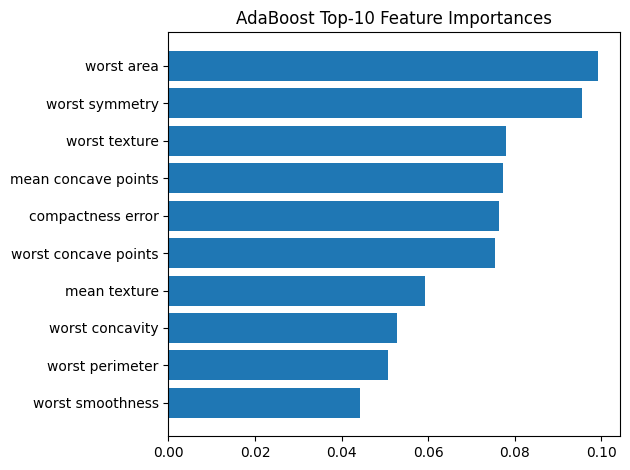

In [10]:
#21. AdaBoost Classifier and visualize feature importance
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adb = AdaBoostClassifier(n_estimators=100, random_state=42)
adb.fit(X_train, y_train)

importances = adb.feature_importances_
idx = importances.argsort()[::-1][:10]
plt.barh(feature_names[idx][::-1], importances[idx][::-1])
plt.title("AdaBoost Top-10 Feature Importances")
plt.tight_layout()
plt.show()


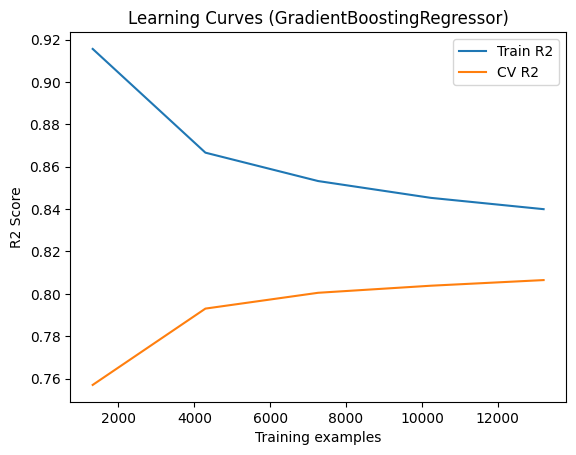

In [11]:
#22. Gradient Boosting Regressor and plot learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=200, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(gbr, X_train, y_train, cv=5,
                                                       train_sizes=np.linspace(0.1,1.0,5), scoring='r2')
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train R2')
plt.plot(train_sizes, val_mean, label='CV R2')
plt.xlabel('Training examples')
plt.ylabel('R2 Score')
plt.legend()
plt.title('Learning Curves (GradientBoostingRegressor)')
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:49:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


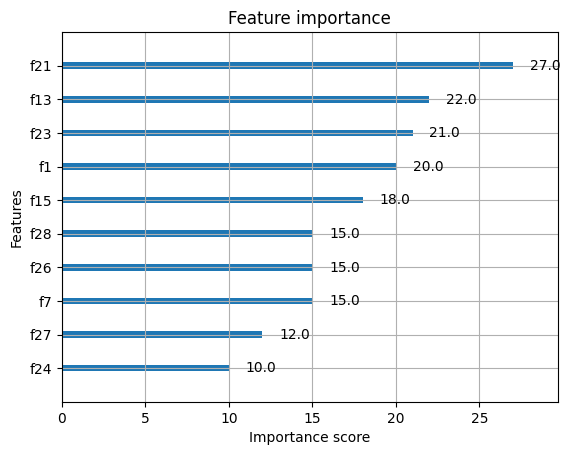

In [12]:
#23. XGBoost Classifier and visualize feature importance
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
plot_importance(xgb, max_num_features=10)
plt.show()


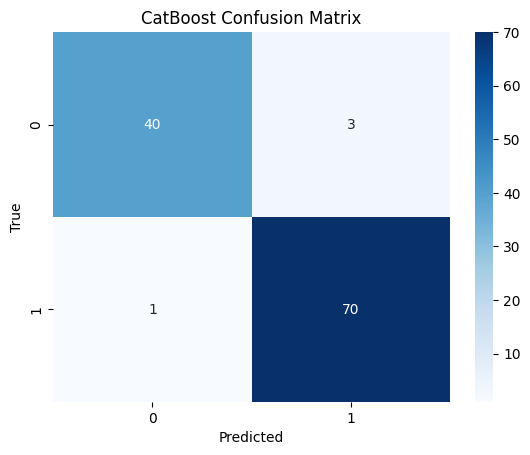

In [13]:
#24. CatBoost Classifier and plot confusion matrix
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cbc = CatBoostClassifier(iterations=200, verbose=0, random_state=42)
cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [14]:
#25. AdaBoost with different n_estimators and compare accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in [10, 50, 100, 200]:
    adb = AdaBoostClassifier(n_estimators=n, random_state=42)
    adb.fit(X_train, y_train)
    print(f"n_estimators={n}, Accuracy={accuracy_score(y_test, adb.predict(X_test)):.4f}")


n_estimators=10, Accuracy=0.9649
n_estimators=50, Accuracy=0.9649
n_estimators=100, Accuracy=0.9737
n_estimators=200, Accuracy=0.9737


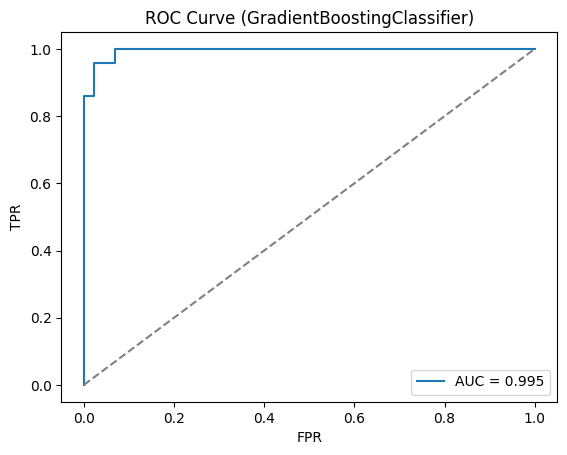

In [15]:
#26. Gradient Boosting Classifier and ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbc.fit(X_train, y_train)
y_prob = gbc.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve (GradientBoostingClassifier)')
plt.legend()
plt.show()


In [16]:
#27. XGBoost Regressor — tune learning_rate via GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgbr = XGBRegressor(n_estimators=200, random_state=42, verbosity=0)
param_grid = {'learning_rate':[0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(xgbr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best learning_rate:", grid.best_params_)
best = grid.best_estimator_
y_pred = best.predict(X_test)
print("MSE (best):", mean_squared_error(y_test, y_pred))


Best learning_rate: {'learning_rate': 0.1}
MSE (best): 0.2151753836692498


In [17]:
#28. CatBoost on imbalanced dataset — compare with class_weighting
# Create an imbalanced binary problem for demo
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=2000, n_features=20, weights=[0.9,0.1], flip_y=0.01, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default CatBoost
cbc_default = CatBoostClassifier(iterations=200, verbose=0, random_state=42)
cbc_default.fit(X_train, y_train)
y_pred_def = cbc_default.predict(X_test)
print("CatBoost default F1:", f1_score(y_test, y_pred_def))

# With class weights (pass class_weights param)
cbc_weighted = CatBoostClassifier(iterations=200, class_weights=[1,9], verbose=0, random_state=42)
cbc_weighted.fit(X_train, y_train)
y_pred_w = cbc_weighted.predict(X_test)
print("CatBoost weighted F1:", f1_score(y_test, y_pred_w))


CatBoost default F1: 0.8307692307692308
CatBoost weighted F1: 0.7631578947368421


In [18]:
#29. AdaBoost — analyze effect of different learning rates
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for lr in [0.01, 0.05, 0.1, 0.5, 1.0]:
    adb = AdaBoostClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    adb.fit(X_train, y_train)
    print(f"learning_rate={lr}, Accuracy={accuracy_score(y_test, adb.predict(X_test)):.4f}")


learning_rate=0.01, Accuracy=0.9386
learning_rate=0.05, Accuracy=0.9561
learning_rate=0.1, Accuracy=0.9561
learning_rate=0.5, Accuracy=0.9649
learning_rate=1.0, Accuracy=0.9737


In [19]:
#30. XGBoost Classifier for multi-class (Iris) and evaluate log-loss
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

X, y = load_iris(return_X_y=True)  # 3 classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=200, random_state=42)
xgb.fit(X_train, y_train)
y_prob = xgb.predict_proba(X_test)
print("Log-loss:", log_loss(y_test, y_prob))
print("Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))


Log-loss: 0.00913190837232336
Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:55:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
